<h1 align="center"> Universidad Politécnica Salesiana 
<h3> Nombre: Carlos Alvarez 
<h3> Materia: Sistemas Expertos
<h3> Practica: Vinos

<h4> Caso práctico de implementación de un sistema de razonamiento basado en casos

## I. Preprocesar los datos del corpus de acuerdo a las sugerenciasdesarrolladas por wguillen [github].
La base de caso original utilizada para el desarrollo del sistema RBC puede ser que se encuentra en: https://archive.ics.uci.edu/ml/datasets/Wine+Quality .

### Instalar API pandas para la manipulación y el análisis de datos
#### pip install pandas
### Importar la  API pandas para procesar los datos del documento excel "winequality-red.csv"

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("winequality-red.csv",sep=';')
lista = [list(row) for row in df.values]
print(len(lista))

1599


Los casos se filtraron eliminando posibles duplicados y datos erróneos,dejando un total de 1517 cajas en la base utilizada por el sistema.

In [3]:
result = []
for item in lista:
    if item not in result:
        result.append(item)
        
print(len(result))

1359


Verificacion de datos duplicados eliminados
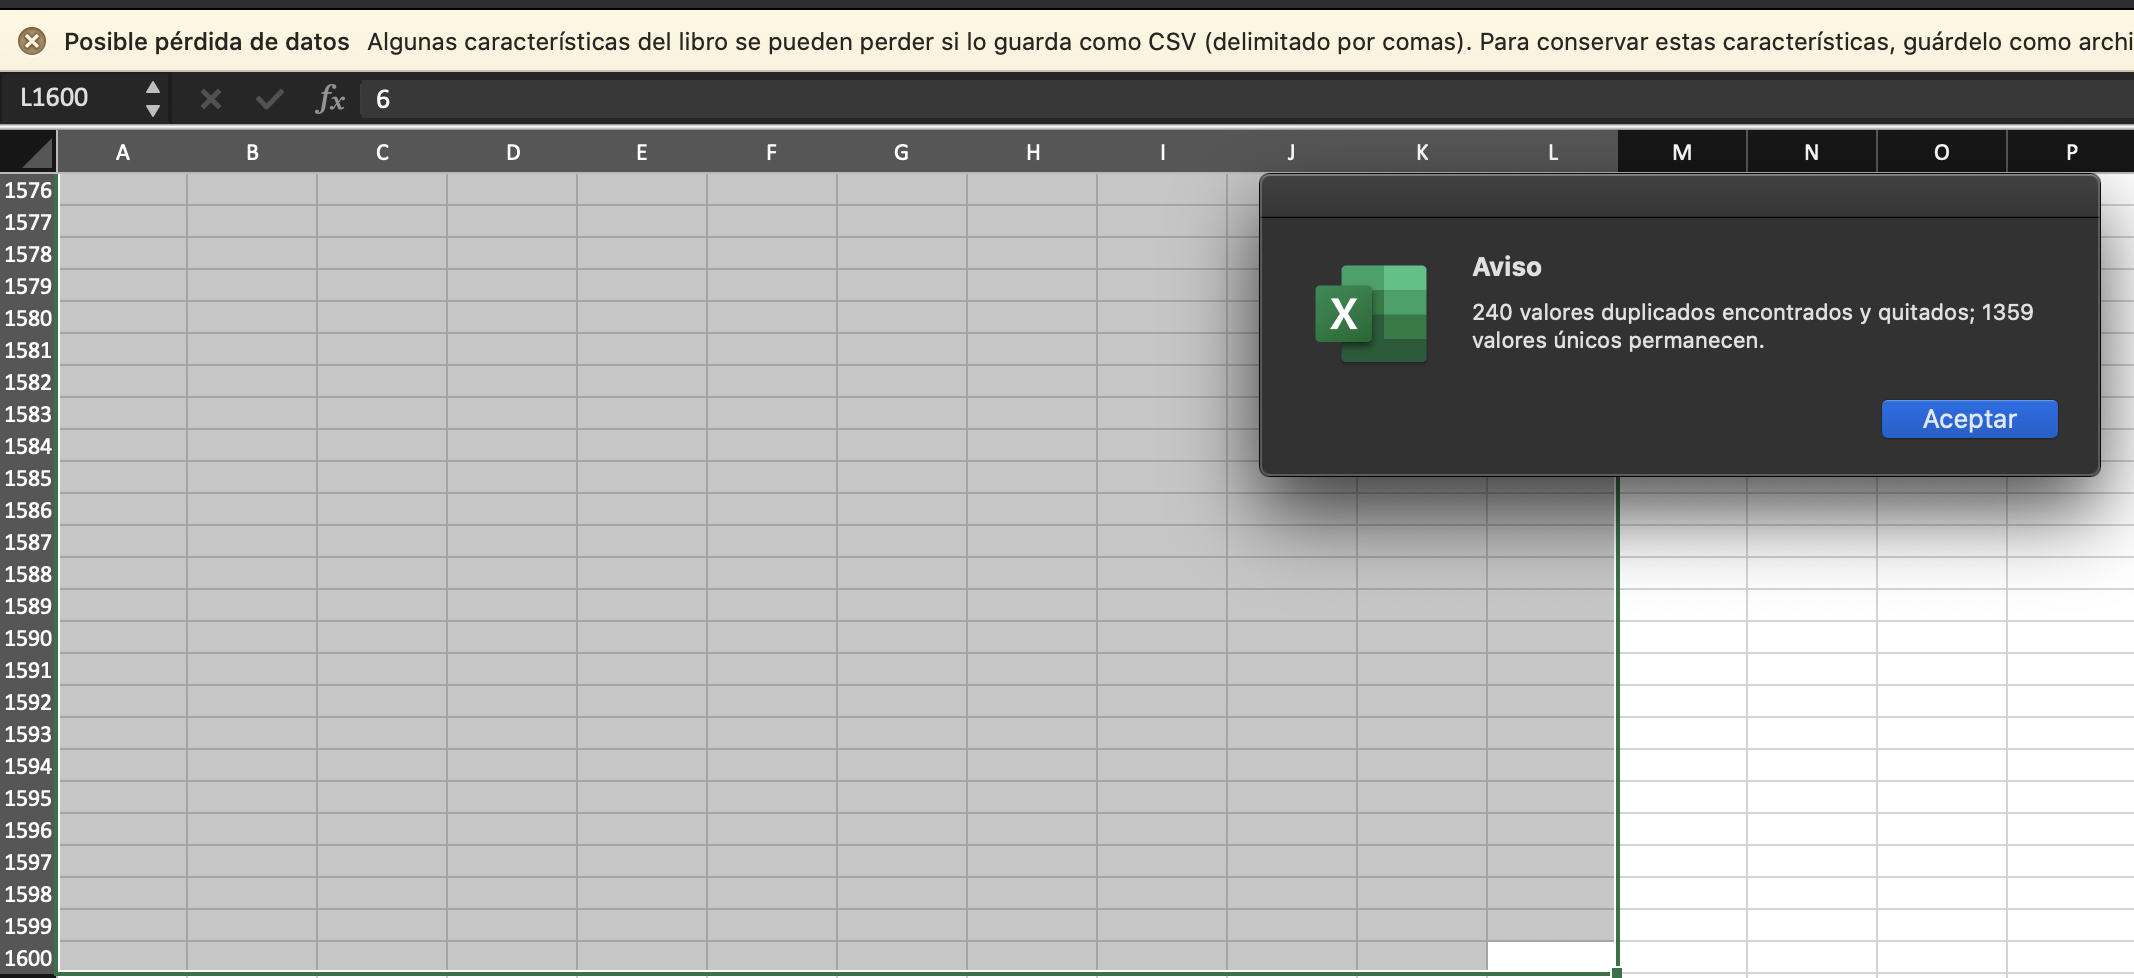

## II.Aplicar la técnicas de los vecinos más cercanos indicada en clase y empleando la fórmula propuesta por wguillen.

El cálculo de similitud entre el caso buscado y los casos de la base de conocimientoocurre a través de la fórmula:

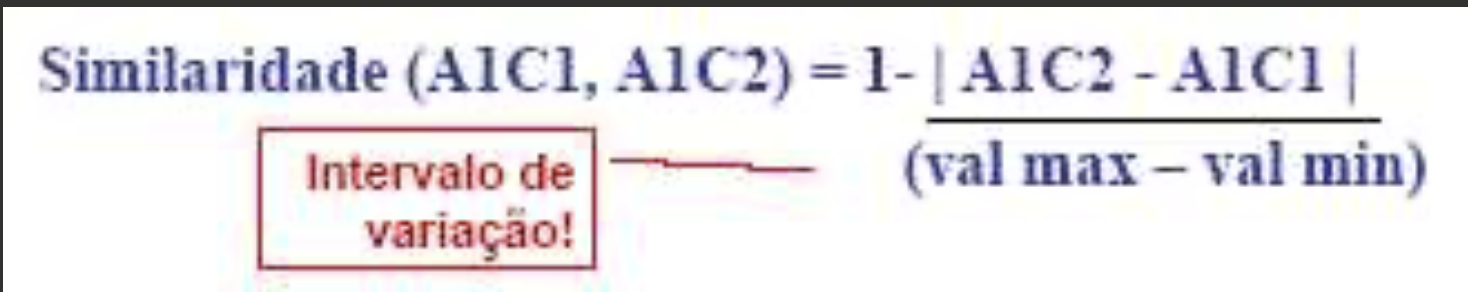

In [4]:
val_min = [4.6, 0.12, 0, 0.9, 0.012, 1, 6, 0.99, 2.74, 0.33, 8.4]
val_max = [15.9, 1.58, 1.0, 13.9, 0.611, 72.0, 289.0, 1.0, 4.01, 2.0, 14.9]
def similaridade(ce, cn, weight):
    valor = 0
    for i in range(len(val_min)):
        valor += weight[i] * (1 - (((ce[i] - cn[i])) / (val_max[i] - val_min[i])))
    return valor / sum(weight)

# Adquirir datos de la interfaz y realizar el calculo de similitud
## Se tienen los siguientes atributos del vino (Tabla 2):
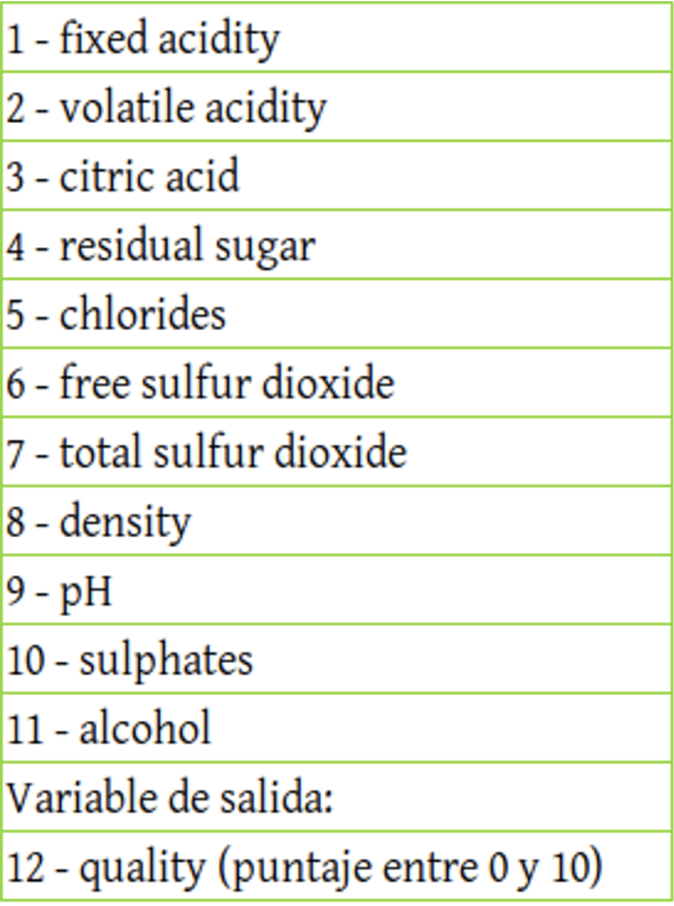

## Crear tabla con los campos establecidos en la imagen anterior

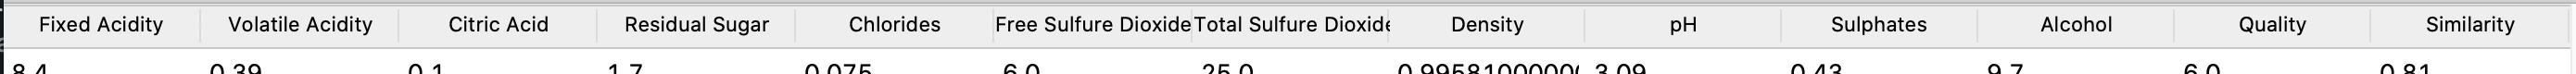

## Importar messagebox de tkinder
La calidad del vino tinti puntua entre 0 y 10, como resutado de imprimira en un Mensaje de Información

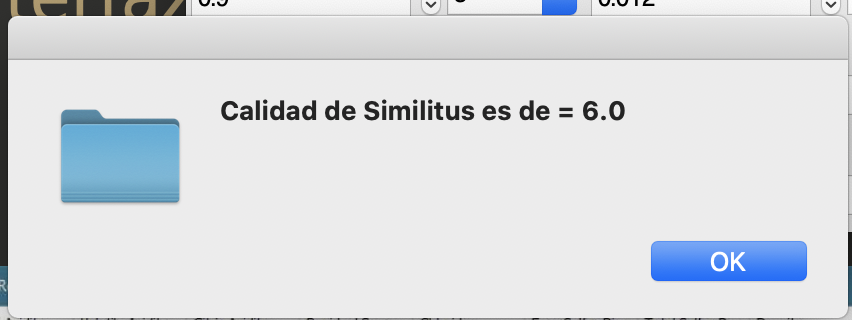



In [44]:
from tkinter import messagebox
def CalcularSimilitud():
    tk_Reporte = Tk()
    tk_Reporte.title("Reporte")
    tk_Reporte.geometry('1400x600')
    lista = result
    similares = {}

    cn = [float(Fixed_Acidy.get()), float(Volatily_Acidy.get()), float(Citric_Acid.get()),
          float(Residual_Sugar.get()), float(Chlorides.get()), float(Free_Sulfur_Dioxide.get()),
          float(Total_Sulfure_Dioxide.get()), float(Density.get()), float(pH.get()), 
          float(Sulphates.get()), float(Alcohol.get())]
    
    weight = [float(Fixed_Acidy_Peso.get()), float(Volatily_Acidy_Peso.get()), float(Citric_Acid_Peso.get()),
              float(Residual_Sugar_Peso.get()), float(Chlorides_Peso.get()),float(Free_Sulfur_Dioxide_Peso.get()),
              float(Total_Sulfure_Dioxide_Peso.get()), float(Density_Peso.get()), float(pH_Peso.get()),
              float(Sulphates_Peso.get()), float(Alcohol_Peso.get())]

    for i in range(len(lista)):
        fila = []
        fila = lista[i]
        x = similaridade(fila, cn, weight )
        similares.update({str(i): round(x, 3)})

    ordenados = dict(sorted(similares.items(), key=operator.itemgetter(1)))
    columna = ("Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", "Free Sulfure Dioxide",
    "Total Sulfure Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality", "Similarity")
    tree = ttk.Treeview(tk_Reporte, columns=columna, show='headings')
    vsb = ttk.Scrollbar(tk_Reporte, command=tree.yview,orient="vertical")
    vsb.pack(side=RIGHT, fill=BOTH)

    tree.configure(yscrollcommand=vsb.set)
    for i in range(len(columna)):
        tree.heading(columna[i], text=columna[i])
        tree.column(columna[i], minwidth=0, width=70)
    tree.pack(expand=YES, fill=BOTH)
    for i in range(len(ordenados)):
        pos = int(list(ordenados.items())[i][0])
        Fixed_Acidy_Campo = lista[int(pos)][0]
        Volatily_Acidy_Campo = lista[int(pos)][1]
        Citric_Acid_Campo = lista[int(pos)][2]
        Residual_Sugar_Campo = lista[int(pos)][3]
        Chlorides_Campo = lista[int(pos)][4]
        Free_Sulfur_Dioxide_Campo = lista[int(pos)][5]
        Total_Sulfure_Dioxide_Campo = lista[int(pos)][6]
        Density_Campo = lista[int(pos)][7]
        pH_Campo = lista[int(pos)][8]
        Sulphates_Campo = lista[int(pos)][9]
        Alcohol_Campo = lista[int(pos)][10]
        Quality_Campo = lista[int(pos)][11]
        Similary_Campo = str(list(ordenados.items())[i][1])
        tree.insert("", 0, i, values=( Fixed_Acidy_Campo, Volatily_Acidy_Campo ,Citric_Acid_Campo, 
                                      Residual_Sugar_Campo, Chlorides_Campo,Free_Sulfur_Dioxide_Campo, 
                                      Total_Sulfure_Dioxide_Campo, Density_Campo, pH_Campo, Sulphates_Campo,
                                      Alcohol_Campo, Quality_Campo, Similary_Campo))


    aux = list(ordenados.items())[len(ordenados) - 1][0]
    res = lista[int(aux)][11]
    messagebox.showinfo(message="Calidad de Similitus es de = " + str(res))

## III. Desarrollar una pequeña interfaz en Python u otro lenguaje donde se coloquen los atributos y el sistema indique la calidad del vino.

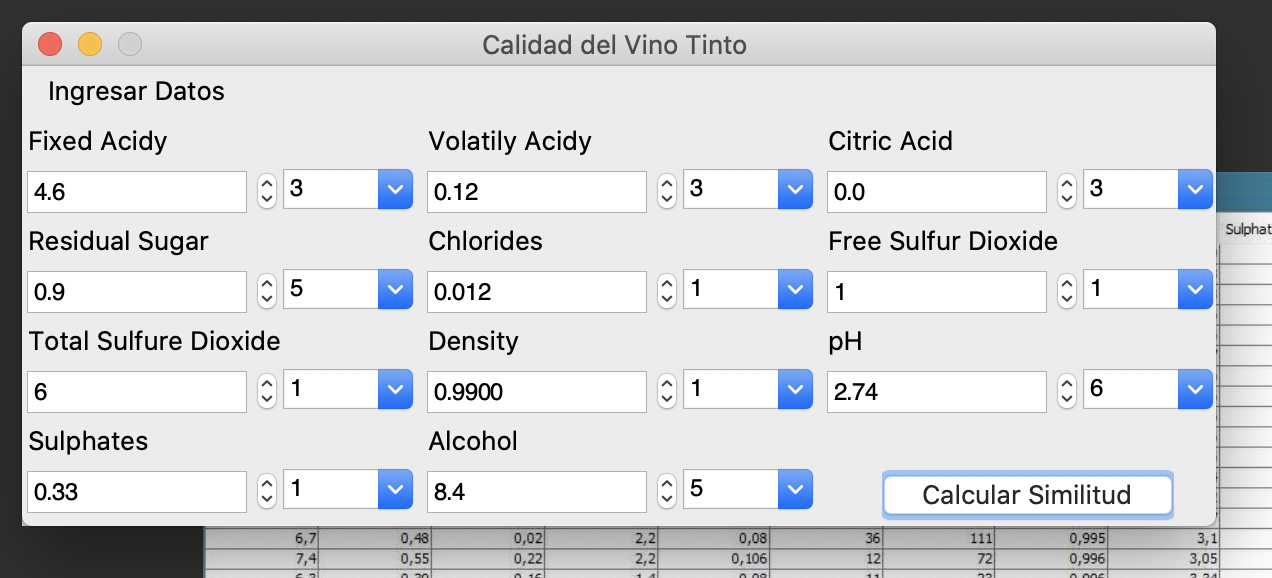

In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import operator
tk = Tk()

lista_Weight = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

tk.geometry('597x230')

tk.title('Calidad del Vino Tinto ')
tk.resizable(height=FALSE,width=FALSE)

Label(tk, text="Ingresar Datos").place(x=10, y=0)

Label(tk, text="Fixed Acidy").place(x=0, y=25)
Fixed_Acidy = Spinbox(tk, from_=4.6, to=15.9, width=15, increment=0.1, font='Helvetica 12')
Fixed_Acidy.place(x=0, y=50)
Fixed_Acidy_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Fixed_Acidy_Peso.place(x=130, y=50)
Fixed_Acidy_Peso.current(3)

Label(tk, text="Volatily Acidy").place(x=200, y= 25)
Volatily_Acidy = Spinbox(tk, from_=0.12, to=1.58, width=15, increment=0.01, font='Helvetica 12')
Volatily_Acidy.place(x=200, y=50)
Volatily_Acidy_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Volatily_Acidy_Peso.place(x=330, y=50)
Volatily_Acidy_Peso.current(3)

Label(tk, text="Citric Acid").place(x=400, y=25)
Citric_Acid = Spinbox(tk, from_=0.0, to=1.0, width=15, increment=0.1, font='Helvetica 12')
Citric_Acid.place(x=400, y=50)
Citric_Acid_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Citric_Acid_Peso.place(x=530, y=50)
Citric_Acid_Peso.current(3)

Label(tk, text="Residual Sugar").place(x=0, y=75)
Residual_Sugar = Spinbox(tk, from_=0.9, to=13.9, width=15, increment=0.1, font='Helvetica 12')
Residual_Sugar.place(x=0, y=100)
Residual_Sugar_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Residual_Sugar_Peso.place(x=130, y=100)
Residual_Sugar_Peso.current(5)

Label(tk, text="Chlorides").place(x=200, y=75)
Chlorides = Spinbox(tk, from_=0.012, to=0.611, width=15, increment=0.001, font='Helvetica 12')
Chlorides.place(x=200, y=100)
Chlorides_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Chlorides_Peso.place(x=330, y=100)
Chlorides_Peso.current(1)

Label(tk, text="Free Sulfur Dioxide").place(x=400, y=75)
Free_Sulfur_Dioxide = Spinbox(tk, from_=1.0, to=72.0, width=15, increment=1.0, font='Helvetica 12')
Free_Sulfur_Dioxide.place(x=400, y=100)
Free_Sulfur_Dioxide_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Free_Sulfur_Dioxide_Peso.place(x=530, y=100)
Free_Sulfur_Dioxide_Peso.current(1)

Label(tk, text="Total Sulfure Dioxide").place(x=0, y=125)
Total_Sulfure_Dioxide = Spinbox(tk, from_=6.0, to=289.0, width=15, increment=1, font='Helvetica 12')
Total_Sulfure_Dioxide.place(x=0, y=150)
Total_Sulfure_Dioxide_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Total_Sulfure_Dioxide_Peso.place(x=130, y=150)
Total_Sulfure_Dioxide_Peso.current(1)

Label(tk, text="Density").place(x=200, y=125)
Density = Spinbox(tk, from_=0.9900, to=1.0000, width=15, increment=0.0001, font='Helvetica 12')
Density.place(x=200, y=150)
Density_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Density_Peso.place(x=330, y=150)
Density_Peso.current(1)

Label(tk, text="pH").place(x=400, y=125)
pH = Spinbox(tk, from_=2.74, to=4.01, width=15, increment=0.01, font='Helvetica 12')
pH.place(x=400, y=150)
pH_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
pH_Peso.place(x=530, y=150)
pH_Peso.current(6)

Label(tk, text="Sulphates").place(x=0, y=175)
Sulphates = Spinbox(tk, from_=0.33, to=2.0, width=15, increment=0.01, font='Helvetica 12')
Sulphates.place(x=0, y=200)
Sulphates_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Sulphates_Peso.place(x=130, y=200)
Sulphates_Peso.current(1)

Label(tk, text="Alcohol").place(x=200, y=175)
Alcohol = Spinbox(tk, from_=8.4, to=14.9, width=15, increment=0.1, font='Helvetica 12')
Alcohol.place(x=200, y=200)
Alcohol_Peso = ttk.Combobox(tk, values=lista_Weight, width=6, font='Helvetica 12')
Alcohol_Peso.place(x=330, y=200)
Alcohol_Peso.current(5)

ttk.Button(tk, text='Calcular Similitud', command=CalcularSimilitud).place(x=430, y=200)
tk.mainloop()

# Resultado Obtenidos

Ingresar datos del vino tinto para ver su similitud con datos almacenados en la base de conocimiento:

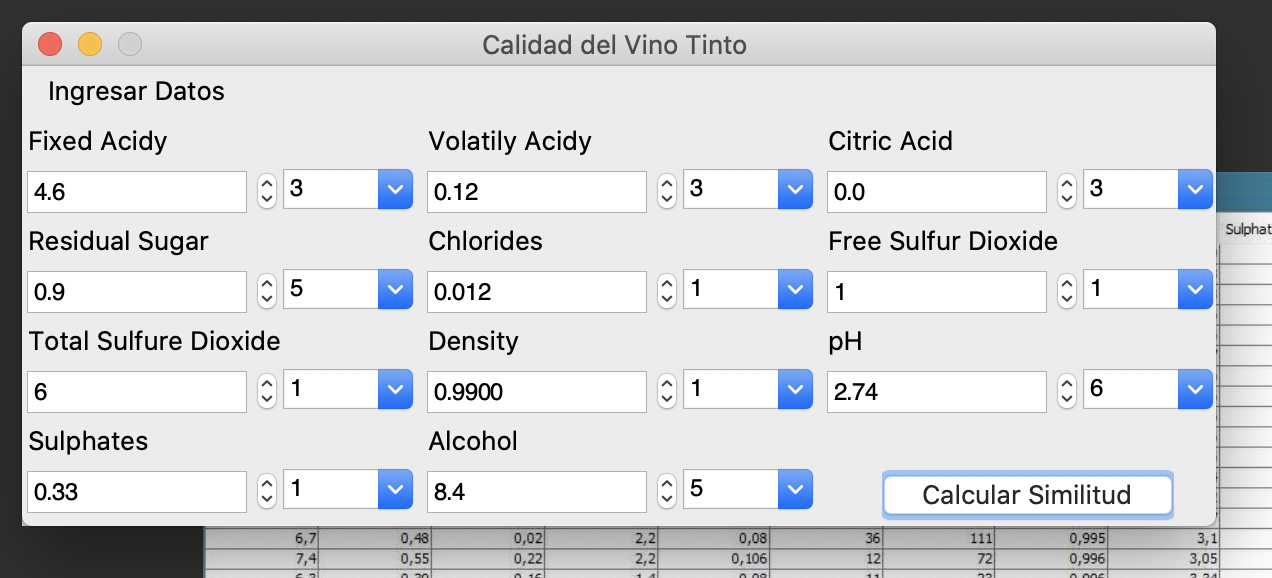

Mensaje sobre la calidad de silimitud del vino tinto ingresado:

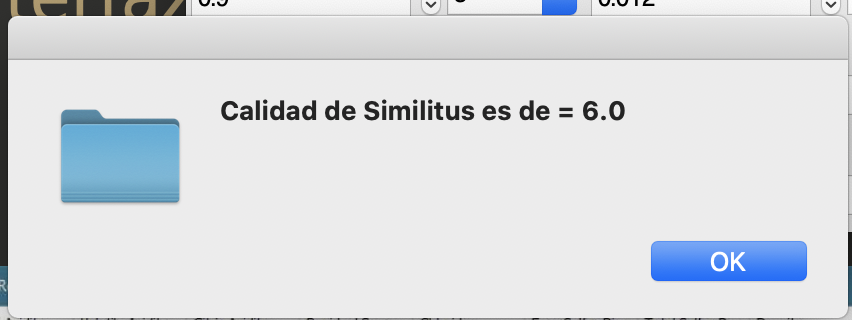

Imprimir la tabla de resultado con referencia a la mayor similitud de los datos almacenados:

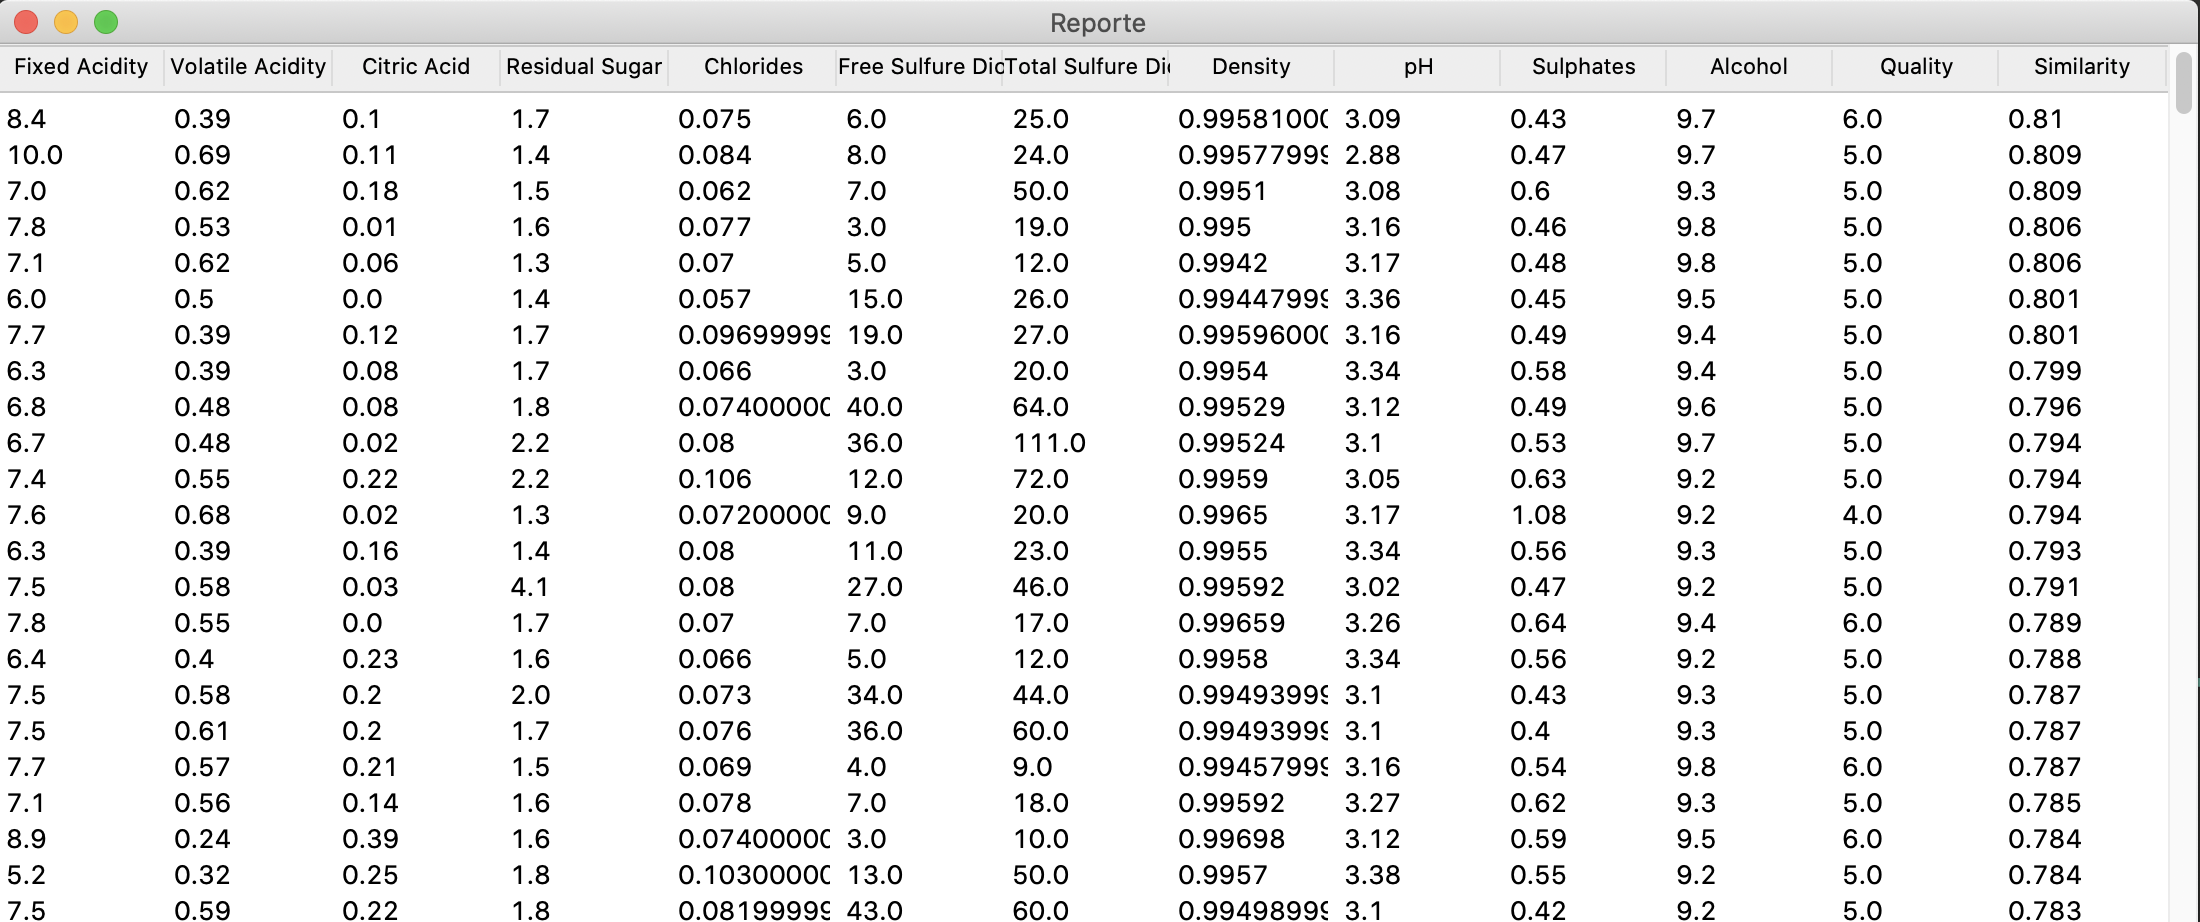

## Conclusiones
Se llego a la conclusión dee que es sisteemas experto es preciso siempree y cuando se tenga una gran base de conocimiento, como en este caso se tiene 1359 datos con lo que ayudo a determinar la calidad del vini tinto, también se recomienda a dar mantenimiento a la base de conocimiento para no tener datos duplicados o ingresar más datos.
## Referencias

[1]
https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via=ihub

[2]
https://github.com/wguilen/red-wine-quality-cbr/tree/master/presentation

[3]
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

[4]
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/